In [11]:
import numpy as np
from model import unet_3d
import matplotlib.pyplot as plt
from display_widget import display_prediction
from load_data import get_data
import tensorflow as tf
from tensorflow.keras.metrics import BinaryIoU
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import load_model
import os
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)


In [2]:
# Root Directory
root_dir = r"data\cerebellum_data"

model_name = os.path.basename(root_dir)[:-5] + "_model"

In [3]:
test_size = 0.3

# Load the training data
patch_size = (64, 64, 64)
X_train, X_test, Y_train, Y_test = get_data(root_dir, patch_size, test_size)


Test Images: 
data\cerebellum_data\image\tc1_272614-ob_c.nii.gz
data\cerebellum_data\image\tc1_276388-ob_c.nii.gz
data\cerebellum_data\image\tc1_272613-ob_c.nii.gz
data\cerebellum_data\image\tc1_275324-ob_c.nii.gz
data\cerebellum_data\image\tc1_269455-ob_c.nii.gz
data\cerebellum_data\image\tc1_272719-ob_c.nii.gz
data\cerebellum_data\image\tc1_275320-ob_c.nii.gz
data\cerebellum_data\image\tc1_276242-ob_c.nii.gz
data\cerebellum_data\image\tc1_272718-ob_c.nii.gz


In [16]:
# Print the shapes of the data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", Y_test.shape)



X_train shape:  (304, 64, 64, 64, 1)
y_train shape:  (304, 64, 64, 64, 2)
X_test shape:  (144, 64, 64, 64, 1)
y_test shape:  (144, 64, 64, 64, 2)


In [18]:
# Create a 3D U-Net model

# Creates model checkpoints in the given path each time the validation loss improves
checkpoint_path = f"./checkpoints/{model_name.replace('model', 'checkpoint')}.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      monitor='val_loss',
                                                      verbose=1,
                                                      save_best_only=True,
                                                      mode='min',
                                                      save_weights_only=False
                                                      )


# Try None input shape again and whole image prediction
num_classes = 2
# input_shape = patch_size + (1,)
input_shape = (None, None, None, 1)
depth = 4

# Try iou with name
loss = BinaryCrossentropy()
metrics = [BinaryIoU()]

model = unet_3d(input_shape=input_shape,
                num_classes=num_classes,
                depth=depth,
                loss=loss,
                metrics=metrics
                )

model._name = model_name

# Display the model summary
model.summary()



Model: "cerebellum_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 None, 1)]                                                        
                                                                                                  
 conv3d_30 (Conv3D)             (None, None, None,   448         ['input_3[0][0]']                
                                None, 16)                                                         
                                                                                                  
 batch_normalization_28 (BatchN  (None, None, None,   64         ['conv3d_30[0][0]']              
 ormalization)                  None, 16)                                          

In [19]:
batch_size = 6
epochs = 50

# Train the model
history = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test),
            callbacks=[model_checkpoint]
          )



Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.6068 - binary_io_u_2: 0.6658
Epoch 1: val_loss improved from inf to 0.68847, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 26s 357ms/step - loss: 0.6068 - binary_io_u_2: 0.6658 - val_loss: 0.6885 - val_binary_io_u_2: 0.7226
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4535 - binary_io_u_2: 0.8552
Epoch 2: val_loss improved from 0.68847 to 0.61566, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 330ms/step - loss: 0.4535 - binary_io_u_2: 0.8552 - val_loss: 0.6157 - val_binary_io_u_2: 0.7226
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.3953 - binary_io_u_2: 0.8988
Epoch 3: val_loss improved from 0.61566 to 0.57374, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 314ms/step - loss: 0.3953 - binary_io_u_2: 0.8988 - val_loss: 0.5737 - val_binary_io_u_2: 0.7226
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.3655 - binary_io_u_2: 0.9079
Epoch 4: val_loss improved from 0.57374 to 0.56165, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 326ms/step - loss: 0.3655 - binary_io_u_2: 0.9079 - val_loss: 0.5617 - val_binary_io_u_2: 0.7226
Epoch 5/50
51/51 [==============================] - ETA: 0s - loss: 0.3388 - binary_io_u_2: 0.9228
Epoch 5: val_loss improved from 0.56165 to 0.54161, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 315ms/step - loss: 0.3388 - binary_io_u_2: 0.9228 - val_loss: 0.5416 - val_binary_io_u_2: 0.7226
Epoch 6/50
51/51 [==============================] - ETA: 0s - loss: 0.3203 - binary_io_u_2: 0.9274
Epoch 6: val_loss improved from 0.54161 to 0.52984, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 314ms/step - loss: 0.3203 - binary_io_u_2: 0.9274 - val_loss: 0.5298 - val_binary_io_u_2: 0.7278
Epoch 7/50
51/51 [==============================] - ETA: 0s - loss: 0.3108 - binary_io_u_2: 0.9250
Epoch 7: val_loss improved from 0.52984 to 0.51467, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 314ms/step - loss: 0.3108 - binary_io_u_2: 0.9250 - val_loss: 0.5147 - val_binary_io_u_2: 0.7376
Epoch 8/50
51/51 [==============================] - ETA: 0s - loss: 0.2905 - binary_io_u_2: 0.9357
Epoch 8: val_loss did not improve from 0.51467
51/51 [==============================] - 10s 194ms/step - loss: 0.2905 - binary_io_u_2: 0.9357 - val_loss: 0.5286 - val_binary_io_u_2: 0.7205
Epoch 9/50
51/51 [==============================] - ETA: 0s - loss: 0.2764 - binary_io_u_2: 0.9414
Epoch 9: val_loss did not improve from 0.51467
51/51 [==============================] - 10s 196ms/step - loss: 0.2764 - binary_io_u_2: 0.9414 - val_loss: 0.5526 - val_binary_io_u_2: 0.6958
Epoch 10/50
51/51 [==============================] - ETA: 0s - loss: 0.2638 - binary_io_u_2: 0.9432
Epoch 10: val_loss improved from 0.51467 to 0.51060, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.c

INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 324ms/step - loss: 0.2638 - binary_io_u_2: 0.9432 - val_loss: 0.5106 - val_binary_io_u_2: 0.7185
Epoch 11/50
51/51 [==============================] - ETA: 0s - loss: 0.2516 - binary_io_u_2: 0.9483
Epoch 11: val_loss improved from 0.51060 to 0.50425, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 316ms/step - loss: 0.2516 - binary_io_u_2: 0.9483 - val_loss: 0.5043 - val_binary_io_u_2: 0.7170
Epoch 12/50
51/51 [==============================] - ETA: 0s - loss: 0.2439 - binary_io_u_2: 0.9461
Epoch 12: val_loss improved from 0.50425 to 0.44974, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 320ms/step - loss: 0.2439 - binary_io_u_2: 0.9461 - val_loss: 0.4497 - val_binary_io_u_2: 0.7586
Epoch 13/50
51/51 [==============================] - ETA: 0s - loss: 0.2299 - binary_io_u_2: 0.9508
Epoch 13: val_loss improved from 0.44974 to 0.39074, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 320ms/step - loss: 0.2299 - binary_io_u_2: 0.9508 - val_loss: 0.3907 - val_binary_io_u_2: 0.8043
Epoch 14/50
51/51 [==============================] - ETA: 0s - loss: 0.2211 - binary_io_u_2: 0.9531
Epoch 14: val_loss improved from 0.39074 to 0.37877, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 315ms/step - loss: 0.2211 - binary_io_u_2: 0.9531 - val_loss: 0.3788 - val_binary_io_u_2: 0.8127
Epoch 15/50
51/51 [==============================] - ETA: 0s - loss: 0.2135 - binary_io_u_2: 0.9524
Epoch 15: val_loss improved from 0.37877 to 0.30043, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 316ms/step - loss: 0.2135 - binary_io_u_2: 0.9524 - val_loss: 0.3004 - val_binary_io_u_2: 0.8955
Epoch 16/50
51/51 [==============================] - ETA: 0s - loss: 0.2112 - binary_io_u_2: 0.9479
Epoch 16: val_loss did not improve from 0.30043
51/51 [==============================] - 10s 194ms/step - loss: 0.2112 - binary_io_u_2: 0.9479 - val_loss: 0.4327 - val_binary_io_u_2: 0.7433
Epoch 17/50
51/51 [==============================] - ETA: 0s - loss: 0.2081 - binary_io_u_2: 0.9455
Epoch 17: val_loss did not improve from 0.30043
51/51 [==============================] - 10s 195ms/step - loss: 0.2081 - binary_io_u_2: 0.9455 - val_loss: 0.3210 - val_binary_io_u_2: 0.8695
Epoch 18/50
51/51 [==============================] - ETA: 0s - loss: 0.1933 - binary_io_u_2: 0.9547
Epoch 18: val_loss improved from 0.30043 to 0.29144, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoi

INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 320ms/step - loss: 0.1933 - binary_io_u_2: 0.9547 - val_loss: 0.2914 - val_binary_io_u_2: 0.9098
Epoch 19/50
51/51 [==============================] - ETA: 0s - loss: 0.1843 - binary_io_u_2: 0.9575
Epoch 19: val_loss did not improve from 0.29144
51/51 [==============================] - 10s 196ms/step - loss: 0.1843 - binary_io_u_2: 0.9575 - val_loss: 0.2921 - val_binary_io_u_2: 0.9042
Epoch 20/50
51/51 [==============================] - ETA: 0s - loss: 0.1790 - binary_io_u_2: 0.9584
Epoch 20: val_loss improved from 0.29144 to 0.27398, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 327ms/step - loss: 0.1790 - binary_io_u_2: 0.9584 - val_loss: 0.2740 - val_binary_io_u_2: 0.9117
Epoch 21/50
51/51 [==============================] - ETA: 0s - loss: 0.1720 - binary_io_u_2: 0.9597
Epoch 21: val_loss improved from 0.27398 to 0.26823, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 324ms/step - loss: 0.1720 - binary_io_u_2: 0.9597 - val_loss: 0.2682 - val_binary_io_u_2: 0.9161
Epoch 22/50
51/51 [==============================] - ETA: 0s - loss: 0.1683 - binary_io_u_2: 0.9601
Epoch 22: val_loss improved from 0.26823 to 0.24801, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 18s 346ms/step - loss: 0.1683 - binary_io_u_2: 0.9601 - val_loss: 0.2480 - val_binary_io_u_2: 0.9159
Epoch 23/50
51/51 [==============================] - ETA: 0s - loss: 0.1619 - binary_io_u_2: 0.9617
Epoch 23: val_loss improved from 0.24801 to 0.24428, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 18s 343ms/step - loss: 0.1619 - binary_io_u_2: 0.9617 - val_loss: 0.2443 - val_binary_io_u_2: 0.9174
Epoch 24/50
51/51 [==============================] - ETA: 0s - loss: 0.1585 - binary_io_u_2: 0.9614
Epoch 24: val_loss improved from 0.24428 to 0.24110, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 338ms/step - loss: 0.1585 - binary_io_u_2: 0.9614 - val_loss: 0.2411 - val_binary_io_u_2: 0.9165
Epoch 25/50
51/51 [==============================] - ETA: 0s - loss: 0.1543 - binary_io_u_2: 0.9616
Epoch 25: val_loss improved from 0.24110 to 0.23911, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 338ms/step - loss: 0.1543 - binary_io_u_2: 0.9616 - val_loss: 0.2391 - val_binary_io_u_2: 0.9099
Epoch 26/50
51/51 [==============================] - ETA: 0s - loss: 0.1524 - binary_io_u_2: 0.9613
Epoch 26: val_loss did not improve from 0.23911
51/51 [==============================] - 10s 196ms/step - loss: 0.1524 - binary_io_u_2: 0.9613 - val_loss: 0.2392 - val_binary_io_u_2: 0.9127
Epoch 27/50
51/51 [==============================] - ETA: 0s - loss: 0.1456 - binary_io_u_2: 0.9630
Epoch 27: val_loss did not improve from 0.23911
51/51 [==============================] - 10s 198ms/step - loss: 0.1456 - binary_io_u_2: 0.9630 - val_loss: 0.2492 - val_binary_io_u_2: 0.9043
Epoch 28/50
51/51 [==============================] - ETA: 0s - loss: 0.1444 - binary_io_u_2: 0.9625
Epoch 28: val_loss improved from 0.23911 to 0.23103, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoi

INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 346ms/step - loss: 0.1444 - binary_io_u_2: 0.9625 - val_loss: 0.2310 - val_binary_io_u_2: 0.9088
Epoch 29/50
51/51 [==============================] - ETA: 0s - loss: 0.1395 - binary_io_u_2: 0.9644
Epoch 29: val_loss did not improve from 0.23103
51/51 [==============================] - 10s 197ms/step - loss: 0.1395 - binary_io_u_2: 0.9644 - val_loss: 0.2404 - val_binary_io_u_2: 0.9220
Epoch 30/50
51/51 [==============================] - ETA: 0s - loss: 0.1355 - binary_io_u_2: 0.9649
Epoch 30: val_loss improved from 0.23103 to 0.22100, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 329ms/step - loss: 0.1355 - binary_io_u_2: 0.9649 - val_loss: 0.2210 - val_binary_io_u_2: 0.9128
Epoch 31/50
51/51 [==============================] - ETA: 0s - loss: 0.1337 - binary_io_u_2: 0.9649
Epoch 31: val_loss improved from 0.22100 to 0.21362, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 325ms/step - loss: 0.1337 - binary_io_u_2: 0.9649 - val_loss: 0.2136 - val_binary_io_u_2: 0.9192
Epoch 32/50
51/51 [==============================] - ETA: 0s - loss: 0.1435 - binary_io_u_2: 0.9531
Epoch 32: val_loss did not improve from 0.21362
51/51 [==============================] - 10s 195ms/step - loss: 0.1435 - binary_io_u_2: 0.9531 - val_loss: 0.5135 - val_binary_io_u_2: 0.7202
Epoch 33/50
51/51 [==============================] - ETA: 0s - loss: 0.1516 - binary_io_u_2: 0.9438
Epoch 33: val_loss did not improve from 0.21362
51/51 [==============================] - 10s 197ms/step - loss: 0.1516 - binary_io_u_2: 0.9438 - val_loss: 0.8159 - val_binary_io_u_2: 0.7223
Epoch 34/50
51/51 [==============================] - ETA: 0s - loss: 0.1339 - binary_io_u_2: 0.9584
Epoch 34: val_loss did not improve from 0.21362
51/51 [==============================] - 10s 199ms/step - loss: 0.1339 - binary_io_u_2: 0.9584 - val_loss: 0.6941 - val_binary_io_

INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 338ms/step - loss: 0.1186 - binary_io_u_2: 0.9641 - val_loss: 0.2043 - val_binary_io_u_2: 0.9204
Epoch 40/50
51/51 [==============================] - ETA: 0s - loss: 0.1145 - binary_io_u_2: 0.9662
Epoch 40: val_loss did not improve from 0.20428
51/51 [==============================] - 10s 196ms/step - loss: 0.1145 - binary_io_u_2: 0.9662 - val_loss: 0.2050 - val_binary_io_u_2: 0.9209
Epoch 41/50
51/51 [==============================] - ETA: 0s - loss: 0.1166 - binary_io_u_2: 0.9644
Epoch 41: val_loss improved from 0.20428 to 0.19476, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 326ms/step - loss: 0.1166 - binary_io_u_2: 0.9644 - val_loss: 0.1948 - val_binary_io_u_2: 0.9176
Epoch 42/50
51/51 [==============================] - ETA: 0s - loss: 0.1117 - binary_io_u_2: 0.9662
Epoch 42: val_loss did not improve from 0.19476
51/51 [==============================] - 10s 196ms/step - loss: 0.1117 - binary_io_u_2: 0.9662 - val_loss: 0.2029 - val_binary_io_u_2: 0.9196
Epoch 43/50
51/51 [==============================] - ETA: 0s - loss: 0.1103 - binary_io_u_2: 0.9664
Epoch 43: val_loss improved from 0.19476 to 0.18806, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 327ms/step - loss: 0.1103 - binary_io_u_2: 0.9664 - val_loss: 0.1881 - val_binary_io_u_2: 0.9212
Epoch 44/50
51/51 [==============================] - ETA: 0s - loss: 0.1080 - binary_io_u_2: 0.9673
Epoch 44: val_loss did not improve from 0.18806
51/51 [==============================] - 10s 196ms/step - loss: 0.1080 - binary_io_u_2: 0.9673 - val_loss: 0.1906 - val_binary_io_u_2: 0.9194
Epoch 45/50
51/51 [==============================] - ETA: 0s - loss: 0.1068 - binary_io_u_2: 0.9675
Epoch 45: val_loss did not improve from 0.18806
51/51 [==============================] - 10s 198ms/step - loss: 0.1068 - binary_io_u_2: 0.9675 - val_loss: 0.1942 - val_binary_io_u_2: 0.9167
Epoch 46/50
51/51 [==============================] - ETA: 0s - loss: 0.1046 - binary_io_u_2: 0.9679
Epoch 46: val_loss did not improve from 0.18806
51/51 [==============================] - 10s 204ms/step - loss: 0.1046 - binary_io_u_2: 0.9679 - val_loss: 0.1909 - val_binary_io_

INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 17s 345ms/step - loss: 0.1015 - binary_io_u_2: 0.9685 - val_loss: 0.1821 - val_binary_io_u_2: 0.9217
Epoch 49/50
51/51 [==============================] - ETA: 0s - loss: 0.0991 - binary_io_u_2: 0.9688
Epoch 49: val_loss did not improve from 0.18205
51/51 [==============================] - 10s 196ms/step - loss: 0.0991 - binary_io_u_2: 0.9688 - val_loss: 0.1899 - val_binary_io_u_2: 0.9164
Epoch 50/50
51/51 [==============================] - ETA: 0s - loss: 0.0979 - binary_io_u_2: 0.9692
Epoch 50: val_loss improved from 0.18205 to 0.17818, saving model to ./checkpoints\cerebellum_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_checkpoint.ckpt\assets


51/51 [==============================] - 16s 326ms/step - loss: 0.0979 - binary_io_u_2: 0.9692 - val_loss: 0.1782 - val_binary_io_u_2: 0.9208


In [23]:
# Evaluate the best model on the test data using `evaluate`

best_model = load_model(checkpoint_path)

print("Evaluate on test data")
results = best_model.evaluate(X_test, Y_test, batch_size=batch_size)
print("test loss, test acc:", results)


Evaluate on test data
24/24 [==============================] - 2s 60ms/step - loss: 0.1782 - binary_io_u_2: 0.9208
test loss, test acc: [0.17817801237106323, 0.9207711219787598]


In [22]:
# Save the best model
best_model.save(f"models/{best_model.name}.h5")

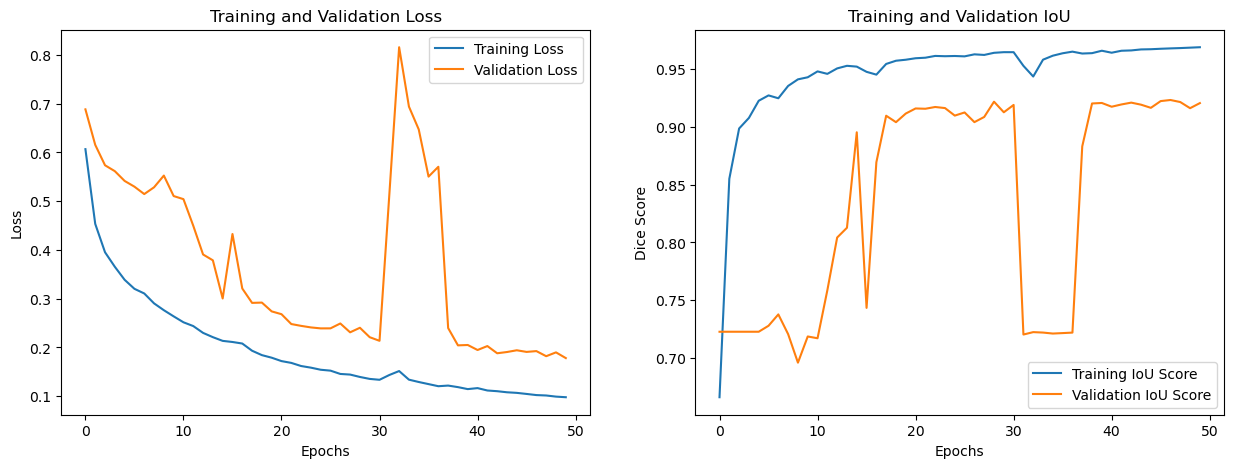

In [27]:
# Show the accuracy of the model over time/epochs

epoch_lst = history.epoch
loss = history.history["loss"]
metric = history.history["binary_io_u_2"]
val_loss = history.history["val_loss"]
val_metric = history.history["val_binary_io_u_2"]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Plot loss and validation loss
ax1.plot(epoch_lst, loss, label="Training Loss")
ax1.plot(epoch_lst, val_loss, label="Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Training and Validation Loss")
ax1.legend()

# Plot the training and validation dice score
ax2.plot(epoch_lst, metric, label="Training IoU Score")
ax2.plot(epoch_lst, val_metric, label="Validation IoU Score")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Dice Score")
ax2.set_title("Training and Validation IoU")
ax2.legend()


plt.show()

In [47]:
# Generate predictions (probabilities -- the output of the last layer)

n_patches = 10
print(f"Generate predictions for {n_patches} samples")
predictions = best_model.predict(X_test[:n_patches])
predictions = np.argmax(predictions, axis=-1)
print("predictions shape:", predictions.shape)



Generate predictions for 10 samples
1/1 [==============================] - 1s 816ms/step
predictions shape: (10, 64, 64, 64)


In [48]:
# Extracts a specific patch from the predicted patches to display.

test_patch_num = 9
image = X_test[test_patch_num]
gt = np.argmax(Y_test, axis=-1)[test_patch_num]
pred = predictions[test_patch_num]



In [49]:
display_prediction(image, gt, pred, alpha = .5)


interactive(children=(Dropdown(description='axes', options=('xy', 'yz', 'xz'), value='xy'), IntSlider(value=0,…